<a href="https://colab.research.google.com/github/rainmaker29/ML701_G12/blob/CNN/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import cv2
import h5py
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
from PIL import Image
from google.colab.patches import cv2_imshow

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import  Sequence

In [ ]:
# Reading the data

with zipfile.ZipFile("/content/train_.zip", "r") as zip_data:
    content_list = zip_data.namelist()
    labels = []
    for folder in ['train_/GALAXY/', 'train_/STAR/', 'train_/QSO/']:
        content_list.remove(folder)
    for _, name_file in enumerate(content_list):
        img_bytes = zip_data.open(name_file)
        img_data = Image.open(img_bytes)
        image_as_array = np.array(img_data, np.uint8)
        if _ == 0:
            data = image_as_array[np.newaxis, :]
        else:
            data = np.concatenate((data, image_as_array[np.newaxis, :]))
        if 'GALAXY' in name_file:
            labels.append('GALAXY')
        elif 'QSO' in name_file:
            labels.append('QSO')
        elif 'STAR' in name_file:
            labels.append('STAR')

In [ ]:
# Saving the data

#with h5py.File('images_matrix.h5', 'w') as hf:
#    hf.create_dataset("images_matrix",  data=x)

#with h5py.File('labels.h5', 'w') as hf:
#    hf.create_dataset("labels",  data=y)

In [ ]:
# Reading the data

#with h5py.File('images_matrix.h5', 'r') as hf:
#    data = hf['images_matrix'][:]

#with h5py.File('labels.h5', 'r') as hf:
#    labels = hf['labels.h5'][:]

In [ ]:
# Shuffling the data

labels = np.array(labels)

shuffler = np.random.RandomState(seed=10).permutation(data.shape[0])

y_not_encoded = labels[shuffler]
y = np.unique(y_not_encoded, return_inverse=True)[1]

x = data[shuffler]
x = x.astype('float32')
x /= 255

In [ ]:
# Splitting the data on train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10, test_size = 0.2)

# Encoding the labels

n_classes = 3
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(128, 128, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(3, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test),)

Epoch 1/10
63/63 [==============================] - 35s 367ms/step - loss: 0.4925 - accuracy: 0.8129 - val_loss: 0.2934 - val_accuracy: 0.9005
Epoch 2/10
63/63 [==============================] - 20s 311ms/step - loss: 0.2575 - accuracy: 0.9110 - val_loss: 0.2710 - val_accuracy: 0.9130
Epoch 3/10
63/63 [==============================] - 20s 316ms/step - loss: 0.1917 - accuracy: 0.9391 - val_loss: 0.2279 - val_accuracy: 0.9235
Epoch 4/10
63/63 [==============================] - 20s 323ms/step - loss: 0.1736 - accuracy: 0.9404 - val_loss: 0.2128 - val_accuracy: 0.9430
Epoch 5/10
63/63 [==============================] - 21s 330ms/step - loss: 0.1558 - accuracy: 0.9501 - val_loss: 0.2778 - val_accuracy: 0.9010
Epoch 6/10
63/63 [==============================] - 21s 331ms/step - loss: 0.1375 - accuracy: 0.9553 - val_loss: 0.2680 - val_accuracy: 0.9035
Epoch 7/10
63/63 [==============================] - 20s 325ms/step - loss: 0.1286 - accuracy: 0.9570 - val_loss: 0.2304 - val_accuracy: 0.9330

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 50)      1400      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 75)      33825     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 75)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 75)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 125)       84500     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 125)      0         
 2D)                                                    

In [ ]:
y_pred = model.predict(x_test)

y_pred_int = np.argmax(y_pred, axis=1)
y_test_int = np.argmax(y_test, axis=1)

result = confusion_matrix(y_test_int, y_pred_int, normalize='pred')

63/63 [==============================] - 3s 30ms/step


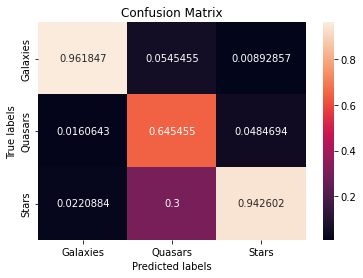

In [ ]:
ax= plt.subplot()
sns.heatmap(result, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Galaxies', 'Quasars', 'Stars']); ax.yaxis.set_ticklabels(['Galaxies', 'Quasars', 'Stars']);

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_int, y_pred_int, target_names=['Galaxies', 'Quasars', 'Stars']))

              precision    recall  f1-score   support

    Galaxies       0.96      0.98      0.97       977
     Quasars       0.65      0.72      0.68       196
       Stars       0.94      0.89      0.92       827

    accuracy                           0.92      2000
   macro avg       0.85      0.87      0.86      2000
weighted avg       0.92      0.92      0.92      2000



# Image data augmentation

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import itertools as it
import matplotlib.pyplot as plt
import requests
import random

In [4]:
with zipfile.ZipFile("/content/train_.zip", "r") as zip_data:
    content_list = zip_data.namelist()
    for folder in ['train_/GALAXY/', 'train_/STAR/', 'train_/QSO/']:
        content_list.remove(folder)

def access_image(name, content_list):
    with zipfile.ZipFile("/content/train_.zip", "r") as zip_data:
        return np.array(Image.open(zip_data.open(name)), np.uint8)

In [5]:
g_images = [name_file for name_file in content_list if 'GALAXY' in name_file]
q_images = [name_file for name_file in content_list if 'QSO' in name_file]
s_images = [name_file for name_file in content_list if 'STAR' in name_file]

print(f'Number of star images: {len(s_images)}. Number of galaxy images: {len(g_images)}. Number of quasar images: {len(q_images)}')

Number of star images: 4152. Number of galaxy images: 4998. Number of quasar images: 850


In [6]:
# Undersampling stars and galaxies
random.seed(0)

g_images_under = random.sample(g_images, 4000)
s_images_under = random.sample(s_images, 4000)

In [7]:
print(f'Number of star images: {len(s_images_under)}. Number of galaxy images: {len(g_images_under)}. Number of quasar images: {len(q_images)}')

Number of star images: 4000. Number of galaxy images: 4000. Number of quasar images: 850


In [8]:
random.seed(0)
g_training = random.sample(g_images_under, 3400)
s_training = random.sample(s_images_under, 3400)
q_training = random.sample(q_images, 250)

g_testing = [name for name in g_images_under if name not in g_training]
s_testing = [name for name in s_images_under if name not in s_training]
q_testing = [name for name in q_images if name not in q_training]

In [9]:
print(len(g_testing), len(s_testing), len(q_testing))
print(len(g_training), len(s_training), len(q_training))

600 600 600
3400 3400 250


In [10]:
with zipfile.ZipFile("/content/train_.zip", "r") as zip_data:
    labels_training = []
    for _, name_file in enumerate(g_training + s_training + q_training):
        img_bytes = zip_data.open(name_file)
        img_data = Image.open(img_bytes)
        image_as_array = np.array(img_data, np.uint8)
        if _ == 0:
            data_training = image_as_array[np.newaxis, :]
        else:
            data_training = np.concatenate((data_training, image_as_array[np.newaxis, :]))
        if 'GALAXY' in name_file:
            labels_training.append('GALAXY')
        elif 'QSO' in name_file:
            labels_training.append('QSO')
        elif 'STAR' in name_file:
            labels_training.append('STAR')

    labels_testing = []
    for _, name_file in enumerate(g_testing + s_testing + q_testing):
        img_bytes = zip_data.open(name_file)
        img_data = Image.open(img_bytes)
        image_as_array = np.array(img_data, np.uint8)
        if _ == 0:
            data_testing = image_as_array[np.newaxis, :]
        else:
            data_testing = np.concatenate((data_testing, image_as_array[np.newaxis, :]))
        if 'GALAXY' in name_file:
            labels_testing.append('GALAXY')
        elif 'QSO' in name_file:
            labels_testing.append('QSO')
        elif 'STAR' in name_file:
            labels_testing.append('STAR')

In [11]:
labels_training = np.array(labels_training)
labels_testing = np.array(labels_testing)

shuffler_training = np.random.RandomState(seed=10).permutation(data_training.shape[0])
shuffler_testing = np.random.RandomState(seed=10).permutation(data_testing.shape[0])

y_train_not_encoded = labels_training[shuffler_training]
y_train_encoded = np.unique(y_train_not_encoded, return_inverse=True)[1]

y_test_not_encoded = labels_testing[shuffler_testing]
y_test_encoded = np.unique(y_test_not_encoded, return_inverse=True)[1]

x_train = data_training[shuffler_training]
x_train = x_train.astype('float32')
x_train /= 255

x_test = data_testing[shuffler_testing]
x_test = x_test.astype('float32')
x_test /= 255

n_classes = 3
y_train = np_utils.to_categorical(y_train_encoded, n_classes)   # [Galaxy, Quasar, Star]
y_test = np_utils.to_categorical(y_test_encoded, n_classes)     # [Galaxy, Quasar, Star]

In [25]:
def augmentation():
  datagen = ImageDataGenerator(fill_mode='constant', dtype=int)
  datagen.fill_mode='nearest'
  datagen.horizontal_flip=True
  datagen.width_shift_range=0.2
  datagen.height_shift_range=0.2
  datagen.zoom_range=[0.8, 1.2]
  datagen.rotation_range=20
  datagen.shear_range=10
  return datagen

def none_data_gen():
  datagen = ImageDataGenerator(rescale=False)
  return datagen

def combine_generator(gen1, gen2):
  while True:
    yield(next(gen1), next(gen2))

class MergedGenerators(Sequence):
    def __init__(self, *generators):
        self.generators = generators
        # TODO add a check to verify that all generators have the same length

    def __len__(self):
        return len(self.generators[0])

    def __getitem__(self, index):
        return [generator[index] for generator in self.generators]

def concat_generators(*gens):
    for gen in gens:
        yield from gen

In [26]:
y_train_quasar = y_train[y_train_encoded == 1]
x_train_quasar = x_train[y_train_encoded == 1]

y_train_rest = y_train[y_train_encoded != 1]
x_train_rest = x_train[y_train_encoded != 1]

In [27]:
y_train_quasar_encoded = y_train_encoded[y_train_encoded == 1]
x_train_quasar = x_train[y_train_encoded == 1]

y_train_rest_encoded = y_train_encoded[y_train_encoded != 1]
x_train_rest = x_train[y_train_encoded != 1]

In [28]:
quasar_gen = augmentation()
rest_gen = none_data_gen()

In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(128, 128, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(3, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Merging generators
gen = augmentation()
#rest_gen = none_data_gen()

flow = rest_gen.flow(x_train, y_train, batch_size = 128, shuffle = False)
#q_flow = quasar_gen.flow(x_train_quasar, y_train_quasar, batch_size = 1, shuffle = False)
#r_flow = rest_gen.flow(x_train_rest, y_train_rest, batch_size = 1, shuffle = False)

#train_merged_generator = concat_generators(q_flow, r_flow)

model.fit_generator(flow, epochs = 10, verbose=1, use_multiprocessing=True, steps_per_epoch = len(x_train) // 128, validation_data = (x_test, y_test))

#for e in range(10):
#    batches = 0
#    for x1, x2 in zip(q_flow,r_flow):
    # x1, x2 are tuples returned by the generator, check whether targets match
#        assert sum(x1[1] != x2[1]) == 0
#        model.fit([x1[0], x2[0]], x1[1], verbose = 1)
#        batches +=1
#        if(batches >= x_train.shape[0]/16):
#            break

# training the model for 10 epochs
#model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test),)

#model.fit(train_generator.flow([x_train_quasar, x_train_rest], [y_train_quasar, y_train_rest], batch_size=16), validation_data = (x_test, y_test), steps_per_epoch = len(x_train) // 16, epochs = 10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


In [ ]:
image = access_image('train_/QSO/image_3663.jpg',content_list)

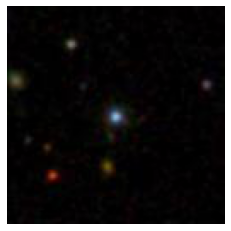

In [ ]:
image = img_to_array(image).astype(int)
data = np.expand_dims(image, 0)
plt.axis('off')
plt.imshow(data[0])

In [ ]:
def default_datagen(data):
  datagen = ImageDataGenerator(fill_mode='constant', dtype=int)
  datagen.fill_mode='nearest'
  datagen.horizontal_flip=True
  datagen.width_shift_range=0.2
  datagen.height_shift_range=0.2
  datagen.zoom_range=[0.8, 1.2]
  datagen.rotation_range=20
  datagen.shear_range=10
  gen_flow = datagen.flow(data)
  return gen_flow

In [ ]:
def plot_augmentation(genflow, data, n_rows=1, n_cols=5):
  n_images = n_rows * n_cols

  plt.figure(figsize=(n_cols*4, n_rows*3))
  for image_index in range(n_images):
    image = next(gen_flow)
    plt.subplot(n_rows, n_cols, image_index+1)
    plt.axis('off')
    plt.imshow(image[0], vmin=0, vmax=255)

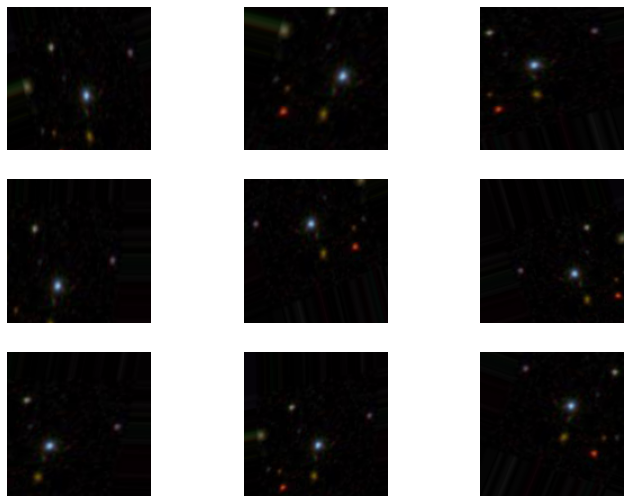

In [ ]:
gen_flow = default_datagen(data)
plot_augmentation(gen_flow, data, n_rows=3, n_cols=3)

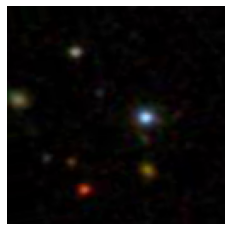

In [ ]:
image = next(gen_flow).astype(int)
plt.axis('off')
plt.imshow(image[0])